## BIKE SHARING LINEAR REGRESSION ASSIGNMENT


In [2]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing pandas, numpy, matplotlib and seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#setting prefereable option for personal readability and understanding of data
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

#### Reading and examining the data

In [5]:
#reading the data csv file
bikeshare = pd.read_csv("day.csv")

In [32]:
#examining the file data

bikeshare.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,1,1,misty/cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,2,1,misty/cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,3,1,clear/misty,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,4,1,clear/misty,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,5,1,clear/misty,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikeshare.shape

(730, 16)

In [8]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#using a function to map categorical values for required coulumns and reading the data to check

seasonlist =  ['season']

def categorical(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

bikeshare[seasonlist] = bikeshare[seasonlist].apply(categorical)

In [11]:
bikeshare['season']

0      spring
1      spring
2      spring
3      spring
4      spring
5      spring
6      spring
7      spring
8      spring
9      spring
10     spring
11     spring
12     spring
13     spring
14     spring
15     spring
16     spring
17     spring
18     spring
19     spring
20     spring
21     spring
22     spring
23     spring
24     spring
25     spring
26     spring
27     spring
28     spring
29     spring
30     spring
31     spring
32     spring
33     spring
34     spring
35     spring
36     spring
37     spring
38     spring
39     spring
40     spring
41     spring
42     spring
43     spring
44     spring
45     spring
46     spring
47     spring
48     spring
49     spring
50     spring
51     spring
52     spring
53     spring
54     spring
55     spring
56     spring
57     spring
58     spring
59     spring
60     spring
61     spring
62     spring
63     spring
64     spring
65     spring
66     spring
67     spring
68     spring
69     spring
70     spring
71    

In [12]:
weathersitlist =  ['weathersit']

def categorical(x):
    return x.map({1: 'clear/misty', 2: 'misty/cloudy', 3: 'lightsnow/lightrain', 4: 'heavysnow/heavyrain/fog'})

bikeshare[weathersitlist] = bikeshare[weathersitlist].apply(categorical)

In [13]:
bikeshare['weathersit']

0             misty/cloudy
1             misty/cloudy
2              clear/misty
3              clear/misty
4              clear/misty
5              clear/misty
6             misty/cloudy
7             misty/cloudy
8              clear/misty
9              clear/misty
10            misty/cloudy
11             clear/misty
12             clear/misty
13             clear/misty
14            misty/cloudy
15             clear/misty
16            misty/cloudy
17            misty/cloudy
18            misty/cloudy
19            misty/cloudy
20             clear/misty
21             clear/misty
22             clear/misty
23             clear/misty
24            misty/cloudy
25     lightsnow/lightrain
26             clear/misty
27            misty/cloudy
28             clear/misty
29             clear/misty
30            misty/cloudy
31            misty/cloudy
32            misty/cloudy
33             clear/misty
34            misty/cloudy
35            misty/cloudy
36             clear/misty
3

In [18]:
mnthlist =  ['mnth']

def categorical(x):
    return x.map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

bikeshare[mnthlist] = bikeshare[mnthlist].apply(categorical)

In [19]:
bikeshare['mnth']

0        january
1        january
2        january
3        january
4        january
5        january
6        january
7        january
8        january
9        january
10       january
11       january
12       january
13       january
14       january
15       january
16       january
17       january
18       january
19       january
20       january
21       january
22       january
23       january
24       january
25       january
26       january
27       january
28       january
29       january
30       january
31      february
32      february
33      february
34      february
35      february
36      february
37      february
38      february
39      february
40      february
41      february
42      february
43      february
44      february
45      february
46      february
47      february
48      february
49      february
50      february
51      february
52      february
53      february
54      february
55      february
56      february
57      february
58      februa

In [20]:
#checking the datatypes again

bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [87]:
#dropping feature columns that are not required

bs2 = bikeshare.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [88]:
bs2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,1,1,misty/cloudy,14.110847,18.181250,80.5833,10.749882,985
1,spring,0,january,0,2,1,misty/cloudy,14.902598,17.686950,69.6087,16.652113,801
2,spring,0,january,0,3,1,clear/misty,8.050924,9.470250,43.7273,16.636703,1349
3,spring,0,january,0,4,1,clear/misty,8.200000,10.606100,59.0435,10.739832,1562
4,spring,0,january,0,5,1,clear/misty,9.305237,11.463500,43.6957,12.522300,1600
5,spring,0,january,0,6,0,clear/misty,8.378268,11.660450,51.8261,6.000868,1606
6,spring,0,january,0,0,0,misty/cloudy,8.057402,10.441950,49.8696,11.304642,1510
7,spring,0,january,0,1,1,misty/cloudy,6.765000,8.112700,53.5833,17.875868,959
8,spring,0,january,0,2,1,clear/misty,5.671653,5.808750,43.4167,24.250650,822
9,spring,0,january,0,3,1,clear/misty,6.184153,7.544400,48.2917,14.958889,1321


#### EDA - Univariate and Bivairate analysis

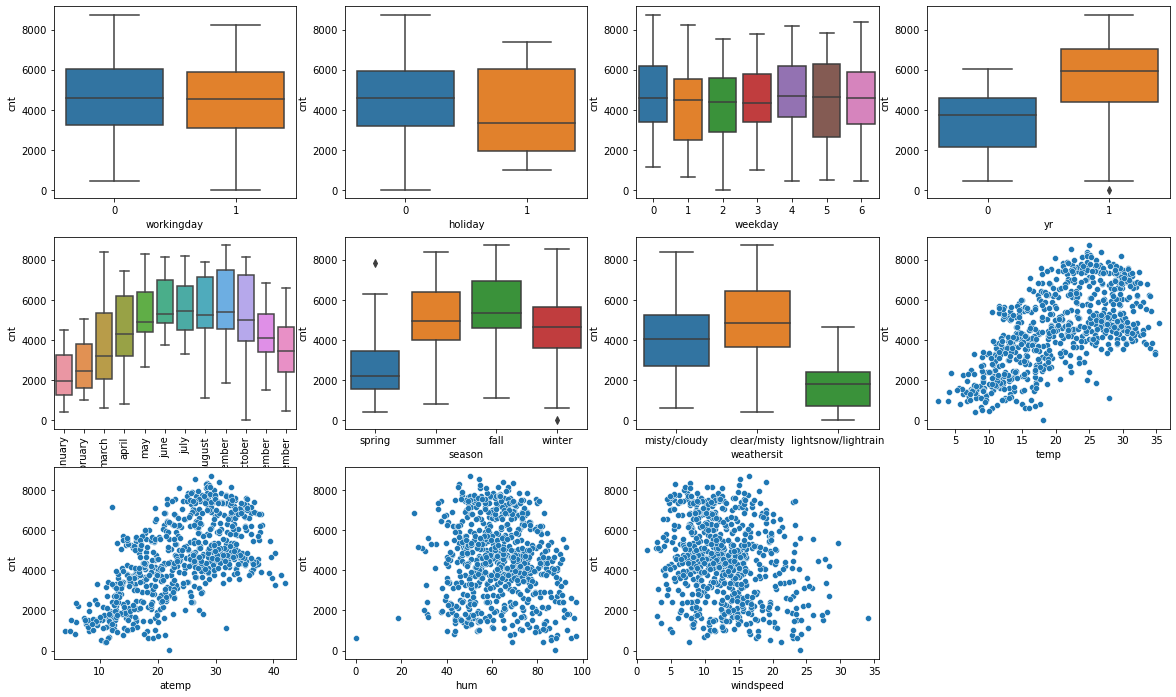

In [109]:
#univariate analysis

plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare)
plt.subplot(3,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.subplot(3,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(3,4,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare)
plt.subplot(3,4,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.xticks(rotation = 90)
plt.subplot(3,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(3,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.subplot(3,4,8)
sns.scatterplot(x = 'temp', y = 'cnt', data = bikeshare)
plt.subplot(3,4,9)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bikeshare)
plt.subplot(3,4,10)
sns.scatterplot(x = 'hum', y = 'cnt', data = bikeshare)
plt.subplot(3,4,11)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bikeshare)
plt.show()



##### 1. The scatterplots of columns temp, atemp which denote temperature and feeling temperature seem to have a relationship with number of people choosing to use bikes. 
##### 2. Clear/misty weather and summer, fall seasons seem to be the climate conditions prefered by a larger range of riders. Ofcourse on holidays more than working days. 

In [ ]:
#bivariate analysis

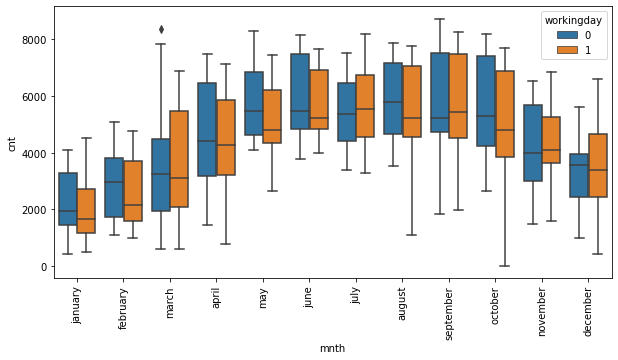

In [90]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue='workingday', data = bs2)
plt.xticks(rotation = 90)
plt.show()

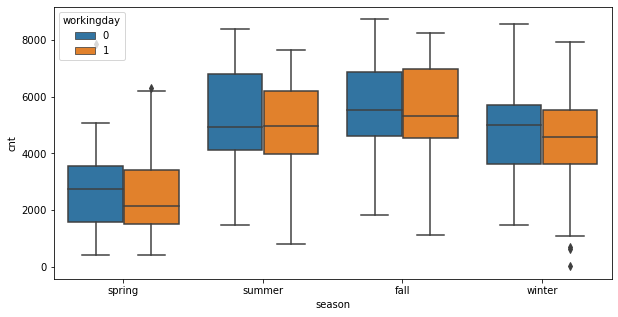

In [91]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue='workingday', data = bs2)

plt.show()

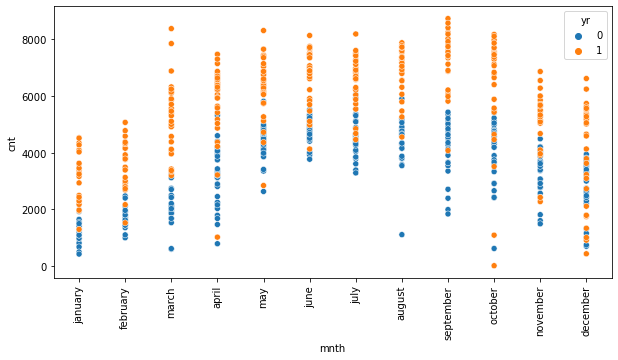

In [92]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'mnth', y = 'cnt', hue='yr', data = bs2)
plt.xticks(rotation = 90)
plt.show()

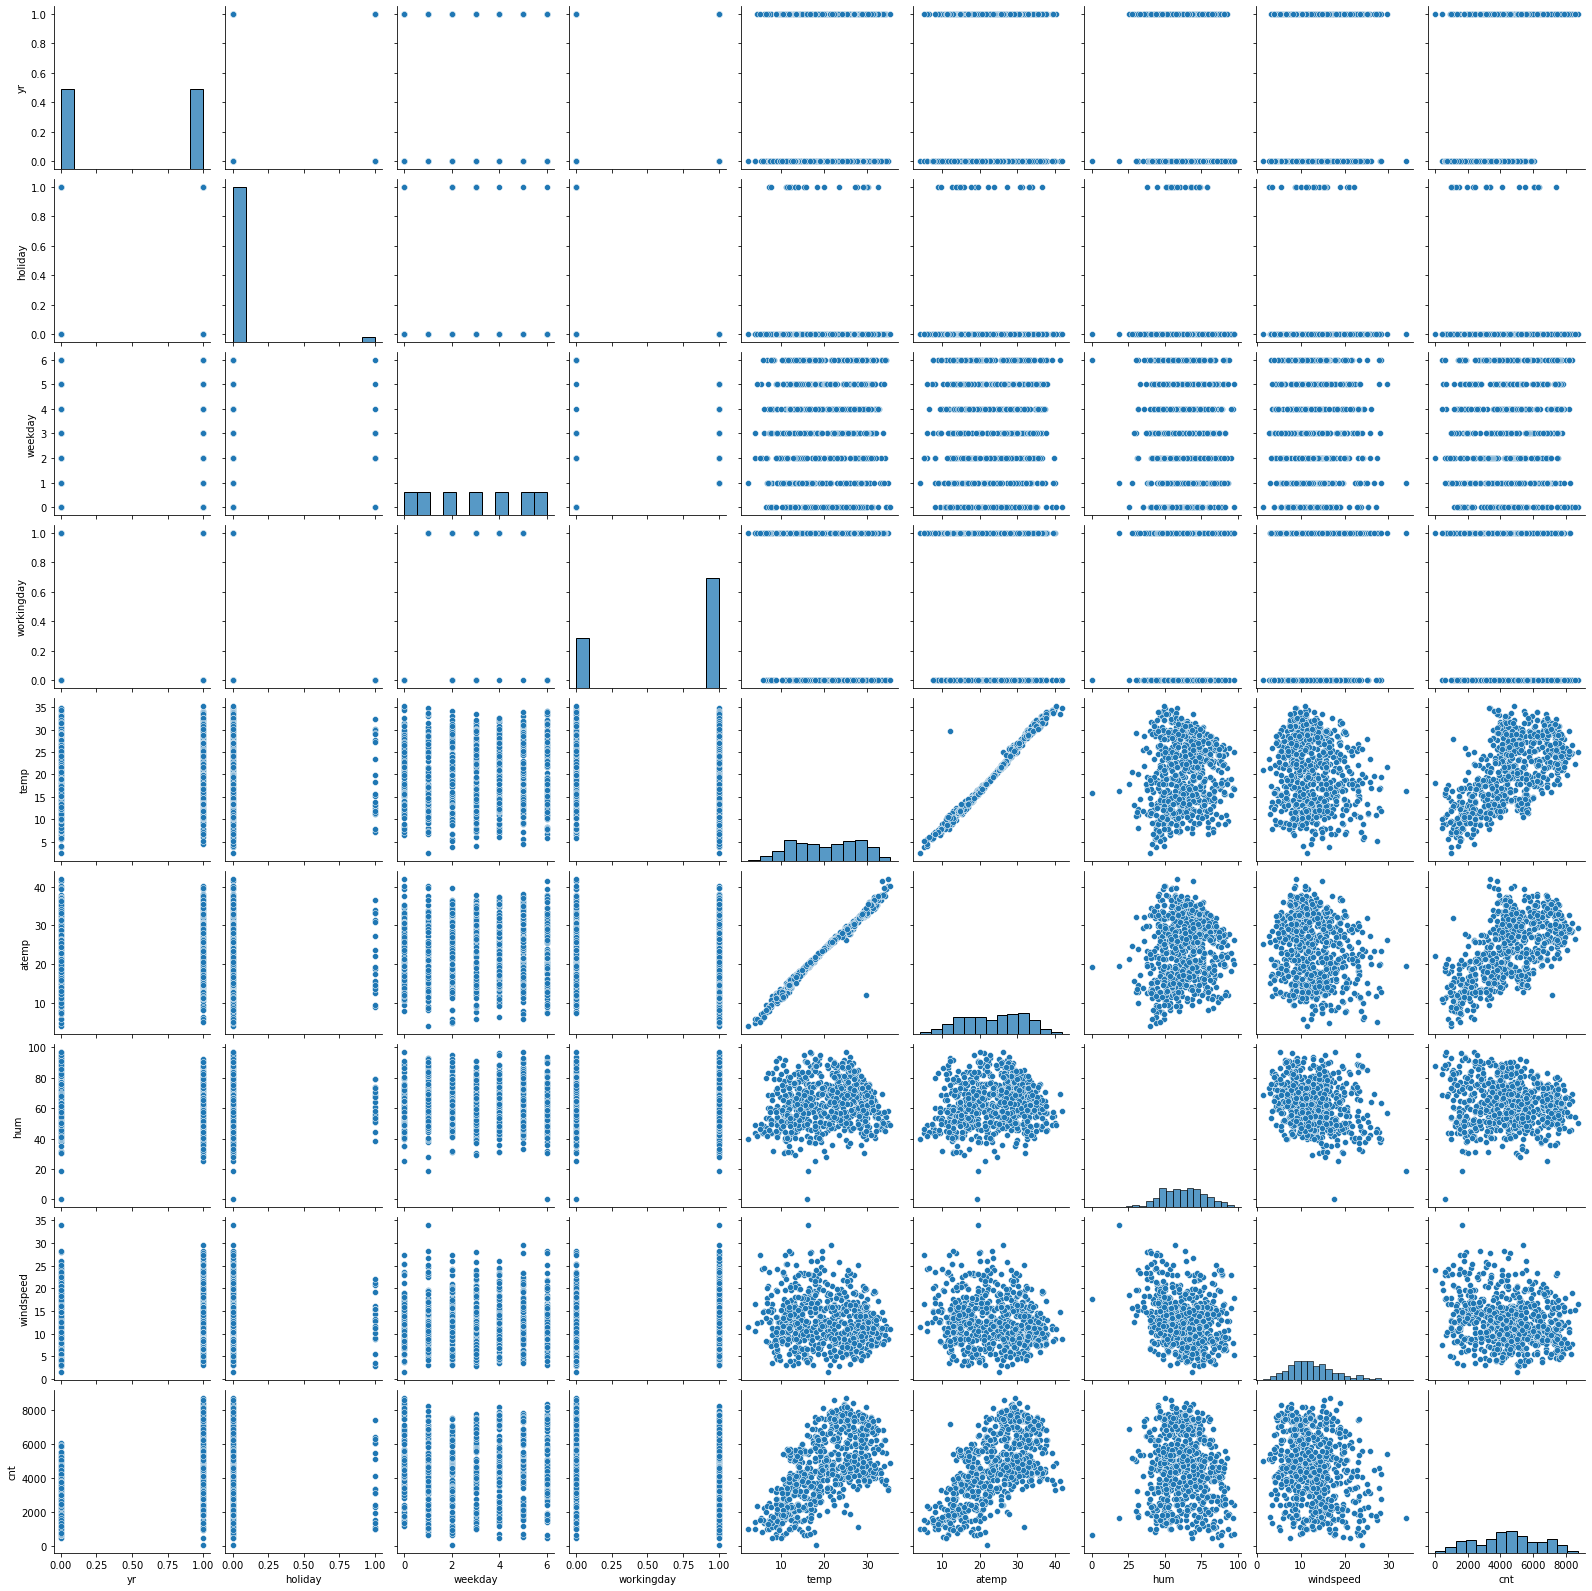

In [93]:

sns.pairplot(bs2)

plt.show()

#### Creating dummy variables for all categorical value columns

In [94]:
season = pd.get_dummies(bs2['season'], drop_first=True)

In [95]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [96]:
bs2 = pd.concat([bs2, season], axis= 1)
bs2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,january,0,1,1,misty/cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,january,0,2,1,misty/cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,january,0,3,1,clear/misty,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,january,0,4,1,clear/misty,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,january,0,5,1,clear/misty,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [97]:
weathersit = pd.get_dummies(bs2['weathersit'], drop_first=True)
weathersit.head()

,lightsnow/lightrain,misty/cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [98]:
bs2 = pd.concat([bs2, weathersit], axis= 1)
bs2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow/lightrain,misty/cloudy
0,spring,0,january,0,1,1,misty/cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,january,0,2,1,misty/cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,january,0,3,1,clear/misty,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,january,0,4,1,clear/misty,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,january,0,5,1,clear/misty,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [100]:
mnth = pd.get_dummies(bs2['mnth'], drop_first=True)
mnth.head()

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [101]:
bs2 = pd.concat([bs2, mnth], axis= 1)
bs2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow/lightrain,misty/cloudy,august,december,february,january,july,june,march,may,november,october,september
0,spring,0,january,0,1,1,misty/cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,january,0,2,1,misty/cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,january,0,3,1,clear/misty,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,4,1,clear/misty,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,january,0,5,1,clear/misty,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
#dropping the main 'string' columns of categorical variables as we have numerical dummy variables 

bs2.drop(['season', 'weathersit', 'mnth'], axis=1, inplace= True)


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow/lightrain,misty/cloudy,august,december,february,january,july,june,march,may,november,october,september
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
bs2.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow/lightrain,misty/cloudy,august,december,february,january,july,june,march,may,november,october,september
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Importing from SKLearn, the train test split and scaler functions 

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

np.random.seed(0)
df_train, df_test = train_test_split(bs2, train_size= 0.7, test_size = 0.3, random_state = 100) #splitting into train and test sets with 70-30% split


In [118]:
scaler = MinMaxScaler()

#scaling all columns except dummy and yes-no type variables using fit_transform for train and transform for test sets 

scale_varbs = ['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt' ]

df_train[scale_varbs] = scaler.fit_transform(df_train[scale_varbs])



In [121]:
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow/lightrain,misty/cloudy,august,december,february,january,july,june,march,may,november,october,september
653,1.0,0,3,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1.0,0,3,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1.0,0,0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,1.0,0,1,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1.0,0,0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [122]:
df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,lightsnow/lightrain,misty/cloudy,august,december,february,january,july,june,march,may,november,october,september
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.950980,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,1.977166,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df_train.shape

(510, 24)

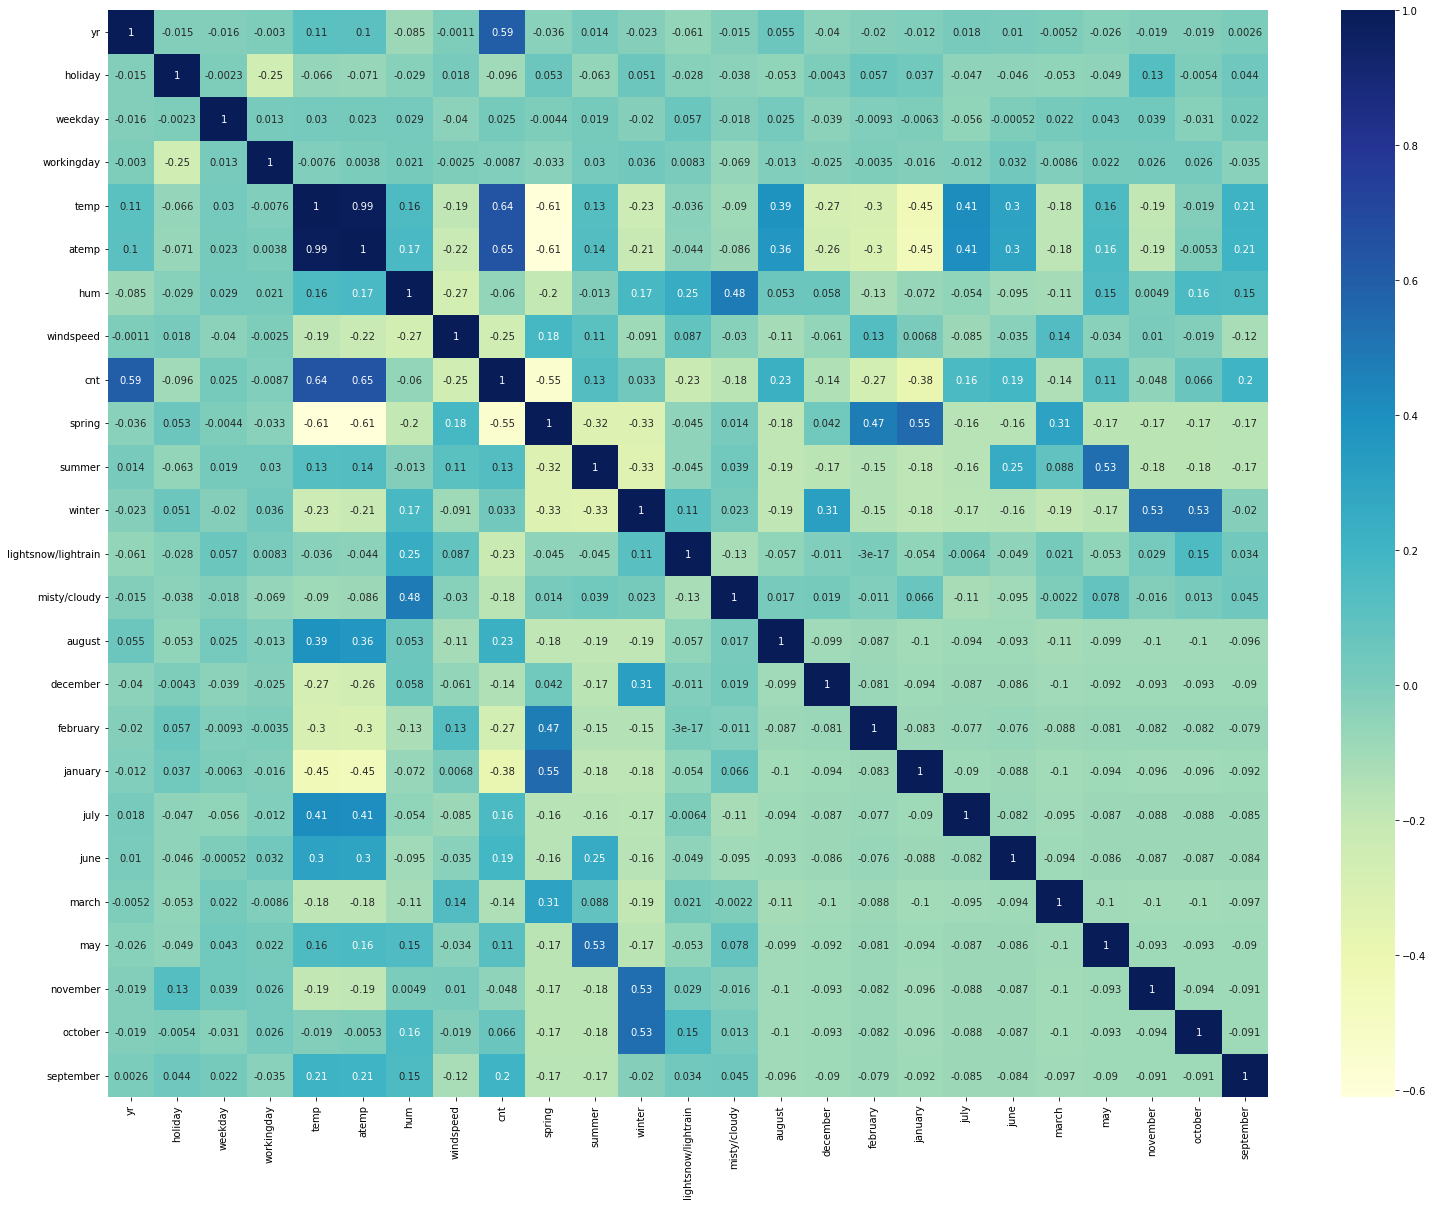

In [124]:
#checking for better correlations between variables

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

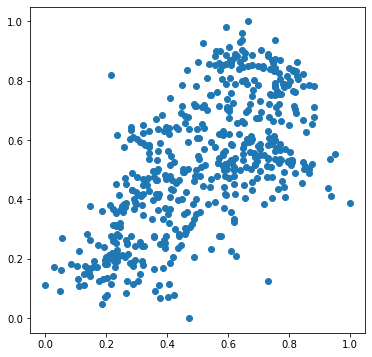

In [125]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

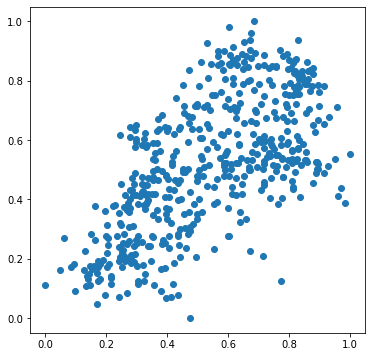

In [126]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Creating the linear regression model and using RFE for feature selection 

In [127]:
y_train = df_train.pop('cnt')
X_train = df_train

In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [137]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [138]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 12),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('lightsnow/lightrain', True, 1),
 ('misty/cloudy', True, 1),
 ('august', False, 9),
 ('december', False, 4),
 ('february', False, 5),
 ('january', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 11),
 ('may', False, 6),
 ('november', False, 3),
 ('october', False, 10),
 ('september', True, 1)]

In [142]:
#checking the columns that are selected and not selected by RFE 

selected = X_train.columns[rfe.support_]
selected

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'lightsnow/lightrain', 'misty/cloudy', 'july', 'september'],
      dtype='object')

In [143]:
#notselected
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'august', 'december', 'february',
       'january', 'june', 'march', 'may', 'november', 'october'],
      dtype='object')

In [163]:
X_train_1 = X_train[selected]

#### Importing statsmodels to create the liner model and get statistical results

In [164]:
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

In [165]:
lm = sm.OLS(y_train,X_train_1).fit()

In [166]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          1.69e-190
Time:                        19:10:43   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2841    

In [168]:
X_train_2 = X_train_1.drop(['const'], axis=1)

In [169]:
#checking VIF value for prediction

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
9,misty/cloudy,2.28
0,yr,2.08
10,july,1.58
11,september,1.38


In [170]:
#removing higher VIF value variables due to multicolinearity and running the model again 

X_train_3 = X_train_2.drop(['hum'], axis=1) 

In [171]:
X_train_3 = sm.add_constant(X_train_3)

In [172]:
lm = sm.OLS(y_train,X_train_3).fit()

In [173]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          2.40e-187
Time:                        19:12:11   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1996    

In [174]:
X_train_4 = X_train_3.drop(['const'], axis=1)

In [175]:
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,july,1.58
8,misty/cloudy,1.55
10,september,1.34
7,lightsnow/lightrain,1.08


In [182]:
y_train_lm = lm.predict(X_train_3)

Text(0.5, 0, 'Errors')

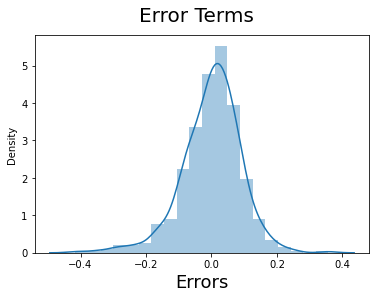

In [183]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_lm), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Training set seems to have achived required assumptions with the used model. Going forward with the test model evaluation and prediction. 

In [184]:
scale_varbs = ['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt' ]

df_test[scale_varbs] = scaler.transform(df_test[scale_varbs])

In [185]:
y_test = df_test.pop('cnt')
X_test = df_test

In [202]:

X_test_new = X_test[X_train_4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [198]:
y_pred = lm.predict(X_test_new)

In [233]:
from sklearn.metrics import r2_score #importing r-sqrd formula to calculate r-sqrd
r2 = r2_score(y_test, y_pred)

print(r2)

0.804941844098238


Text(0, 0.5, 'y_pred')

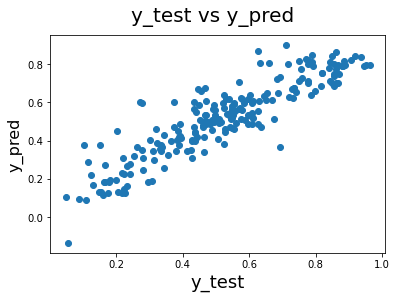

In [203]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### The Equation of our model's best fitted line is: 

#### cnt = 0.236 x yr - 0.098 x holiday + 0.492 x temp - 0.148 x windspeed - 0.067 x spring + 0.045 x summer + 0.083 x winter - 0.285 x lightsnow/lightrain - 0.082 x misty/cloudy - 0.0524 x july + 0.077 x september

#### Finally the train model seems to have a adjRsqrd value of 0.83 and the test model gets an Rsqrd value of 0.80. The scatter plot for predicted vs test models seems to have a consistant variance of a linear fashion which suggests a benefenical analysis for the company. 